# Synthetic Data Generation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Regression problem generation

In [2]:
from sklearn.datasets import make_regression

In [3]:
data1 = make_regression(n_samples=20, n_features=4, n_informative=2, n_targets=1, 
                        bias=0.0, effective_rank=None,tail_strength=0.5, 
                        noise=0.0, shuffle=True, coef=False, random_state=None)
df1 = pd.DataFrame(data1[0],columns=['x'+str(i) for i in range(1,5)])
df1['y'] = data1[1]

In [4]:
df1.head()

,x1,x2,x3,x4,y
0,0.700028,0.134975,1.179370,0.800568,117.156702
1,0.410043,1.043603,-1.764385,0.186605,-45.198227
2,0.353750,0.086171,-0.858684,2.039334,-8.234485
3,-1.859702,-2.757499,-2.660260,-0.031399,-289.317715
4,-0.358904,1.392984,0.071438,0.927881,-28.722176


### Plot

/opt/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


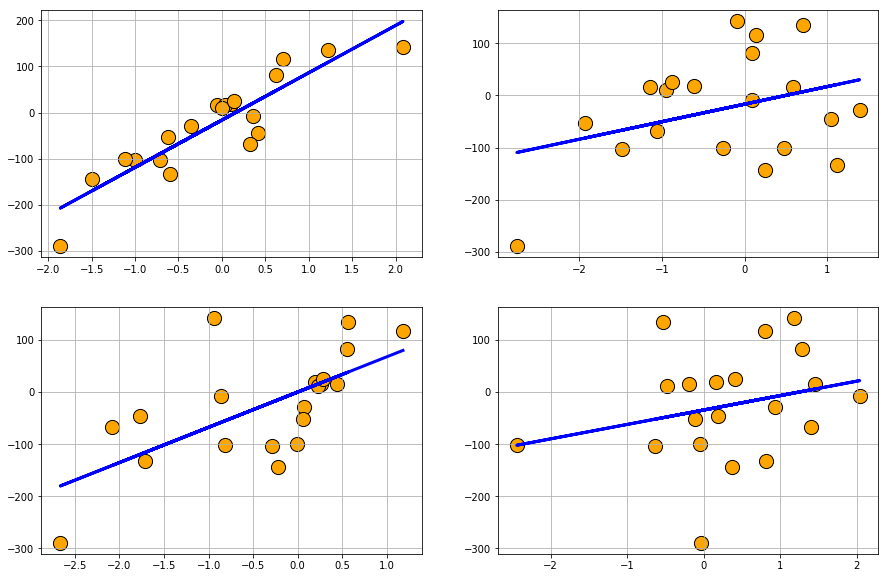

In [5]:
plt.figure(figsize=(15,10))
for i in range(1,5):
    fit = np.polyfit(df1[df1.columns[i-1]],df1['y'],1)
    fit_fn = np.poly1d(fit)
    plt.subplot(2,2,i)
    plt.scatter(df1[df1.columns[i-1]],df1['y'],s=200,c='orange',edgecolor='k')
    plt.plot(df1[df1.columns[i-1]],fit_fn(df1[df1.columns[i-1]]),'b-',lw=3)
    plt.grid(True)

### Data with Gaussian noise

In [6]:
data2 = make_regression(n_samples=20, n_features=4, n_informative=2, n_targets=1, 
                        bias=0.0, effective_rank=None,tail_strength=0.5, 
                        noise=2.0, shuffle=True, coef=False, random_state=None)
df2 = pd.DataFrame(data2[0],columns=['x'+str(i) for i in range(1,5)])
df2['y'] = data2[1]

### Plot

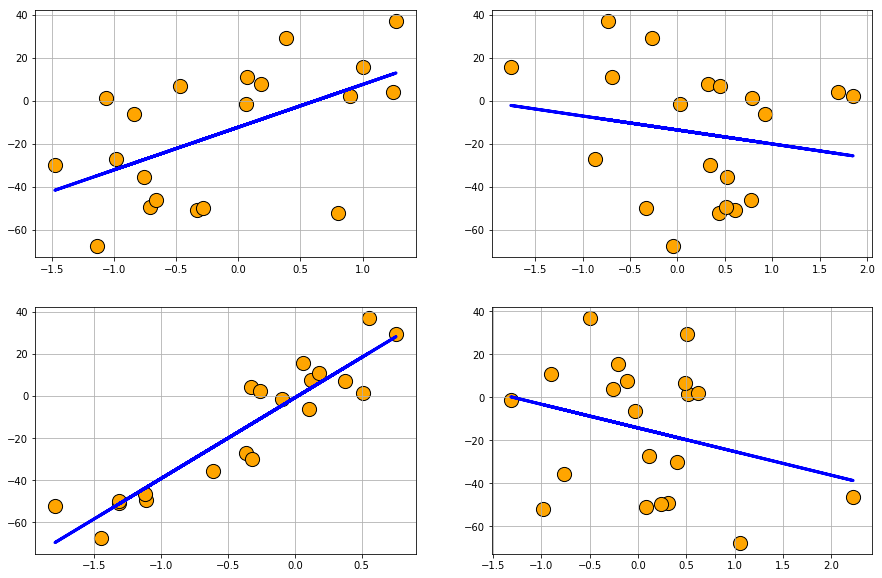

In [7]:
plt.figure(figsize=(15,10))
for i in range(1,5):
    fit = np.polyfit(df2[df2.columns[i-1]],df2['y'],1)
    fit_fn = np.poly1d(fit)
    plt.subplot(2,2,i)
    plt.scatter(df2[df2.columns[i-1]],df2['y'],s=200,c='orange',edgecolor='k')
    plt.plot(df2[df2.columns[i-1]],fit_fn(df2[df2.columns[i-1]]),'b-',lw=3)
    plt.grid(True)

### Plot datasets with varying degree of noise

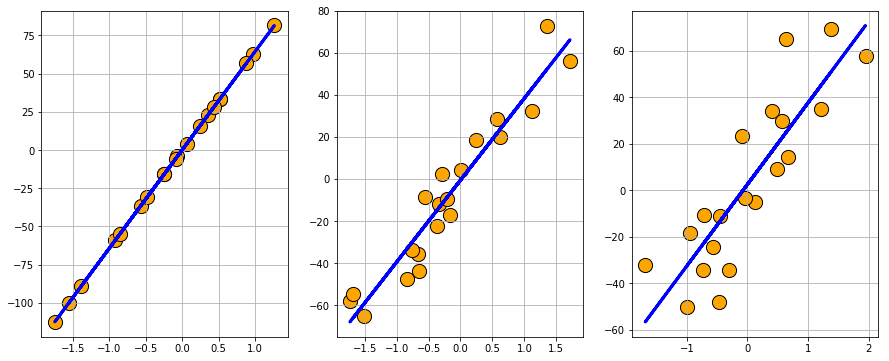

In [8]:
plt.figure(figsize=(15,6))
df2 = pd.DataFrame(data=np.zeros((20,1)))
for i in range(3):
    data2 = make_regression(n_samples=20, n_features=1, n_informative=1, n_targets=1, 
                        bias=0.0, effective_rank=None,tail_strength=0.5, 
                        noise=i*10, shuffle=True, coef=False, random_state=None)
    df2['x'+str(i+1)]=data2[0]
    df2['y'+str(i+1)] = data2[1]

for i in range(3):
    fit = np.polyfit(df2['x'+str(i+1)],df2['y'+str(i+1)],1)
    fit_fn = np.poly1d(fit)
    plt.subplot(1,3,i+1)
    plt.scatter(df2['x'+str(i+1)],df2['y'+str(i+1)],s=200,c='orange',edgecolor='k')
    plt.plot(df2['x'+str(i+1)],fit_fn(df2['x'+str(i+1)]),'b-',lw=3)
    plt.grid(True)

## Classification problem generation

In [9]:
from sklearn.datasets import make_classification

In [10]:
data3 = make_classification(n_samples=20, n_features=4, n_informative=4, n_redundant=0, n_repeated=0, 
                            n_classes=2, n_clusters_per_class=1, weights=None, flip_y=0.01, class_sep=1.0, 
                            hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
df3 = pd.DataFrame(data3[0],columns=['x'+str(i) for i in range(1,5)])
df3['y'] = data3[1]

In [11]:
df3.head()

,x1,x2,x3,x4,y
0,-0.280096,1.341898,-1.318206,-1.347645,1
1,1.919213,-1.859924,-1.875967,0.388657,0
2,0.931519,-1.691424,0.126638,1.826623,0
3,-1.145547,1.004050,-0.823556,-0.528727,1
4,1.878607,-0.914497,-1.326475,1.055294,0


### Plot

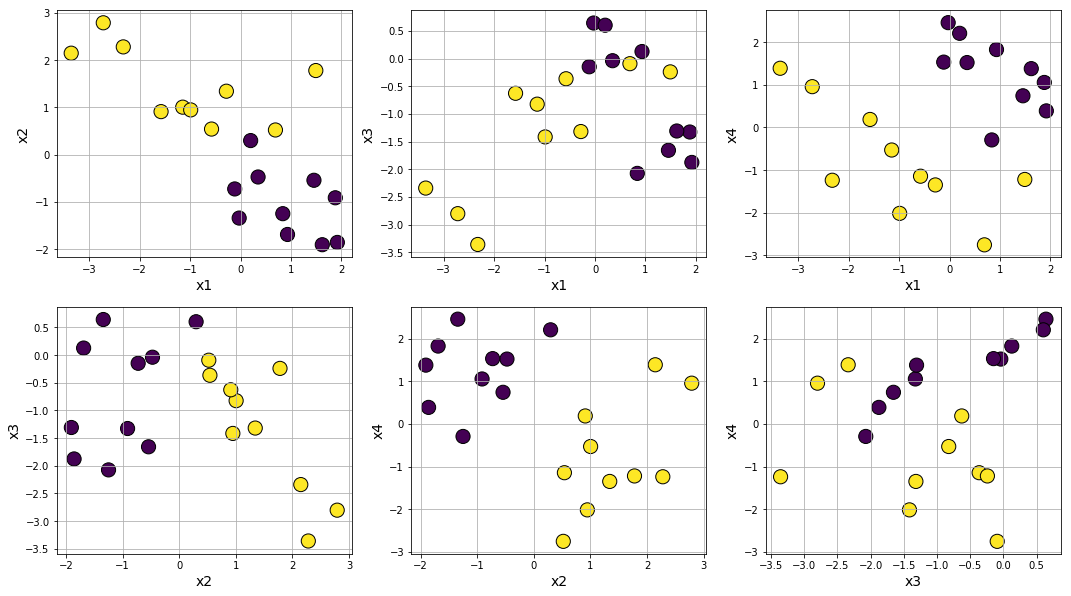

In [12]:
from itertools import combinations
from math import ceil
lst_var=list(combinations(df3.columns[:-1],2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df3[var1],df3[var2],s=200,c=df3['y'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

### Making class separation easy by tweaking `class_sep`

In [13]:
data3 = make_classification(n_samples=20, n_features=4, n_informative=4, n_redundant=0, n_repeated=0, 
                            n_classes=2, n_clusters_per_class=1, weights=None, flip_y=0.01, class_sep=3.0, 
                            hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
df3 = pd.DataFrame(data3[0],columns=['x'+str(i) for i in range(1,5)])
df3['y'] = data3[1]

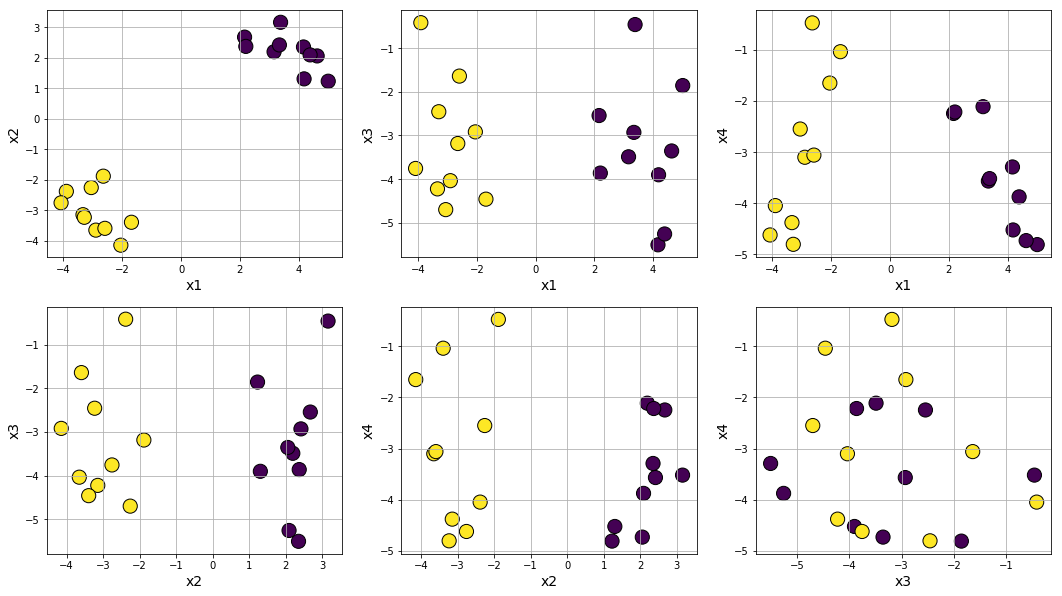

In [14]:
from itertools import combinations
from math import ceil
lst_var=list(combinations(df3.columns[:-1],2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df3[var1],df3[var2],s=200,c=df3['y'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

### Making class separation hard by tweaking `class_sep`

In [15]:
data3 = make_classification(n_samples=20, n_features=4, n_informative=4, n_redundant=0, n_repeated=0, 
                            n_classes=2, n_clusters_per_class=1, weights=None, flip_y=0.01, class_sep=0.5, 
                            hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
df3 = pd.DataFrame(data3[0],columns=['x'+str(i) for i in range(1,5)])
df3['y'] = data3[1]

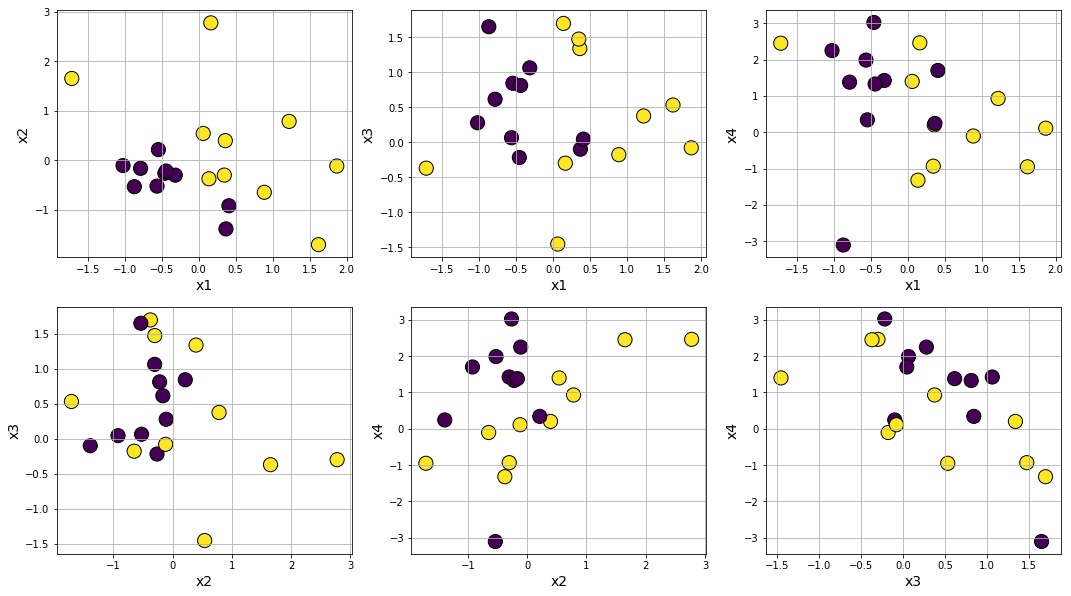

In [16]:
from itertools import combinations
from math import ceil
lst_var=list(combinations(df3.columns[:-1],2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df3[var1],df3[var2],s=200,c=df3['y'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

### Making data noisy by increasing `flip_y`

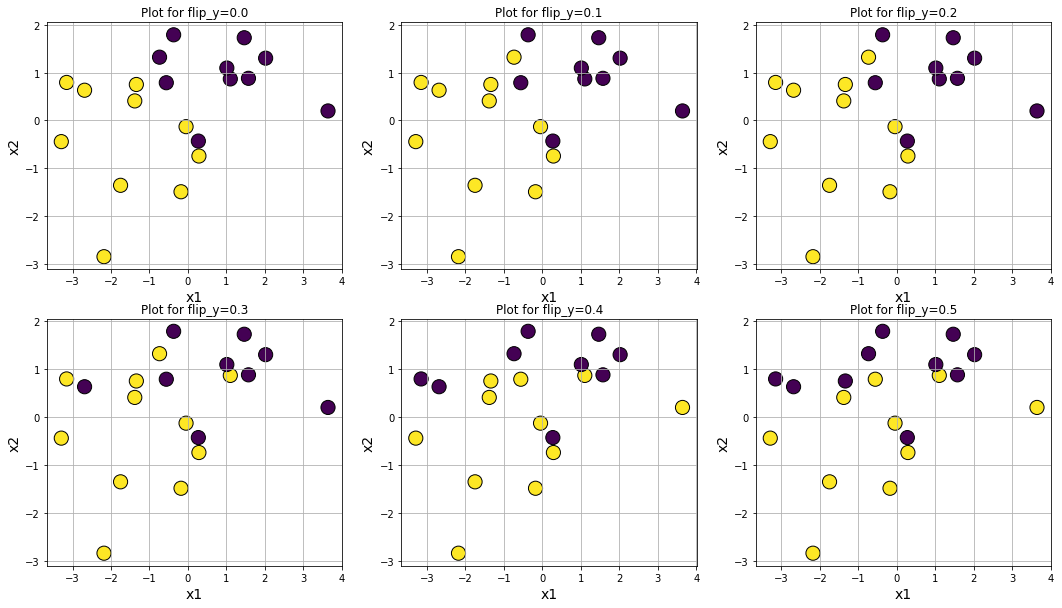

In [17]:
plt.figure(figsize=(18,10))
for i in range(6):
    data3 = make_classification(n_samples=20, n_features=4, n_informative=4, n_redundant=0, n_repeated=0, 
                                n_classes=2, n_clusters_per_class=1, weights=None, flip_y=0.1*i, class_sep=1.0, 
                                hypercube=True, shift=0.0, scale=1.0, shuffle=False, random_state=101)
    df3 = pd.DataFrame(data3[0],columns=['x'+str(i) for i in range(1,5)])
    df3['y'] = data3[1]
    plt.subplot(2,3,i+1)
    plt.title(f"Plot for flip_y={round(0.1*i,2)}")
    plt.scatter(df3['x1'],df3['x2'],s=200,c=df3['y'],edgecolor='k')
    plt.xlabel('x1',fontsize=14)
    plt.ylabel('x2',fontsize=14)
    plt.grid(True)

### Plot datasets with varying degree of class separation

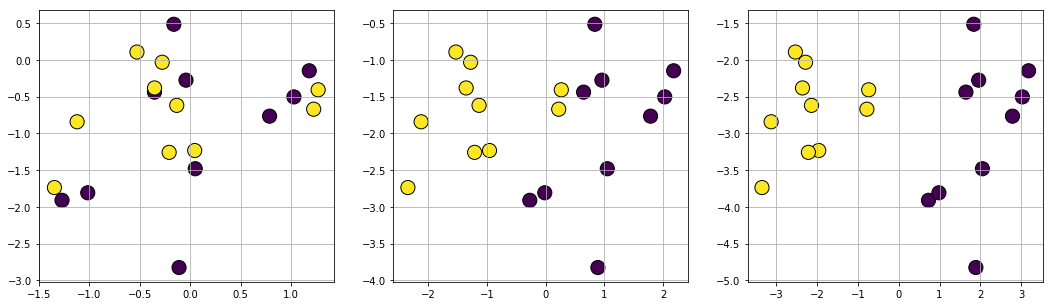

In [18]:
plt.figure(figsize=(18,5))
df2 = pd.DataFrame(data=np.zeros((20,1)))
for i in range(3):
    data2 = make_classification(n_samples=20, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, 
                                n_classes=2, n_clusters_per_class=1, weights=None, flip_y=0, class_sep=i+0.5, 
                                hypercube=True, shift=0.0, scale=1.0, shuffle=False, random_state=101)
    df2['x'+str(i+1)+'1']=data2[0][:,0]
    df2['x'+str(i+1)+'2']=data2[0][:,1]
    df2['y'+str(i+1)] = data2[1]

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.scatter(df2['x'+str(i+1)+'1'],df2['x'+str(i+1)+'2'],s=200,c=df2['y'+str(i+1)],edgecolor='k')
    plt.grid(True)

## Clustering problem generation

In [19]:
from sklearn.datasets import make_blobs

In [20]:
data4 = make_blobs(n_samples=60, n_features=4, centers=3, cluster_std=1.0, 
                   center_box=(-5.0, 5.0), shuffle=True, random_state=None)
df4 = pd.DataFrame(data4[0],columns=['x'+str(i) for i in range(1,5)])
df4['y'] = data4[1]

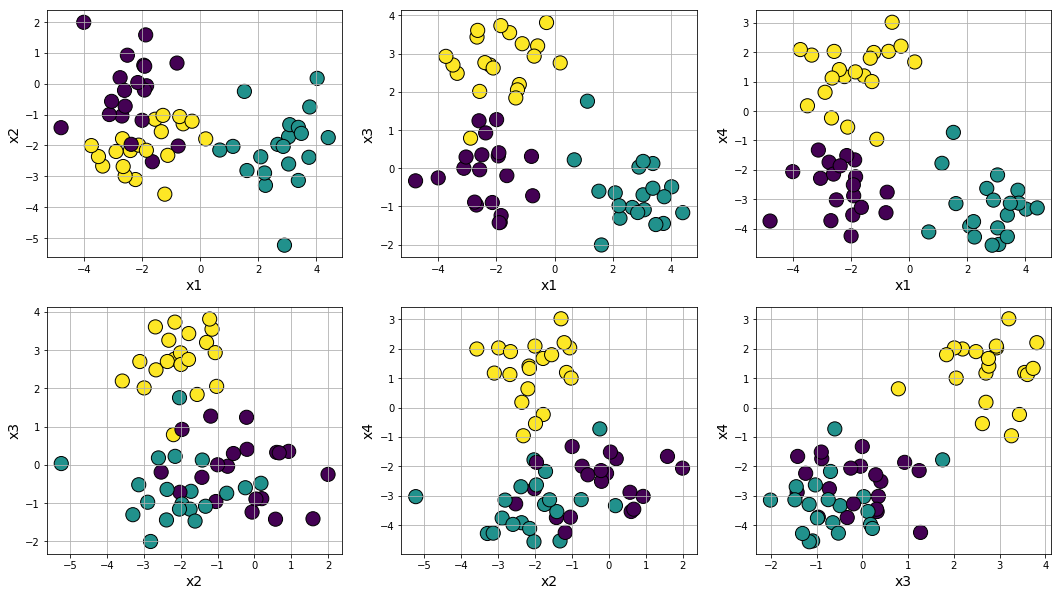

In [21]:
from itertools import combinations
from math import ceil
lst_var=list(combinations(df4.columns[:-1],2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df4[var1],df4[var2],s=200,c=df4['y'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

### Making clusters compact and easily separable by tweaking `cluster_std`

In [22]:
data4 = make_blobs(n_samples=60, n_features=4, centers=3, cluster_std=0.3, 
                   center_box=(-5.0, 5.0), shuffle=True, random_state=None)
df4 = pd.DataFrame(data4[0],columns=['x'+str(i) for i in range(1,5)])
df4['y'] = data4[1]

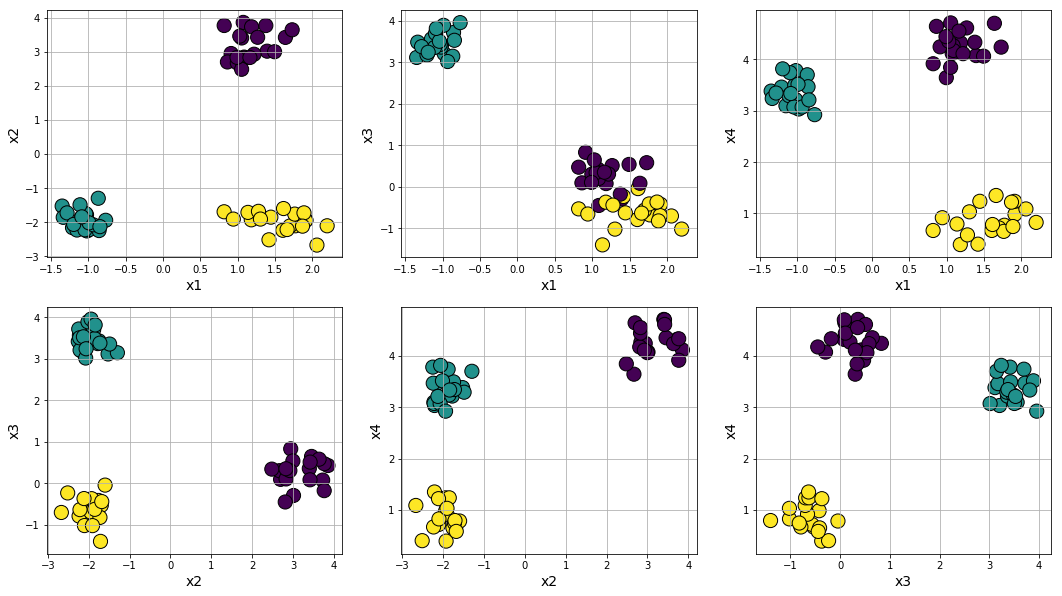

In [23]:
from itertools import combinations
from math import ceil
lst_var=list(combinations(df4.columns[:-1],2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df4[var1],df4[var2],s=200,c=df4['y'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

### Making clusters spread out and difficult to separate by tweaking `cluster_std`

In [24]:
data4 = make_blobs(n_samples=60, n_features=4, centers=3, cluster_std=2.5, 
                   center_box=(-5.0, 5.0), shuffle=True, random_state=None)
df4 = pd.DataFrame(data4[0],columns=['x'+str(i) for i in range(1,5)])
df4['y'] = data4[1]

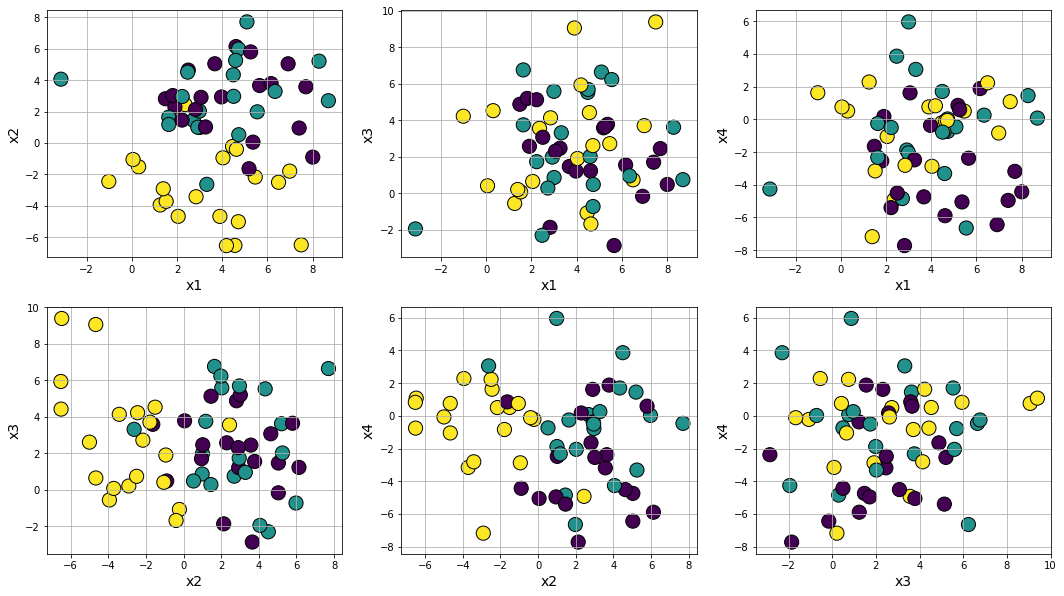

In [25]:
from itertools import combinations
from math import ceil
lst_var=list(combinations(df4.columns[:-1],2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df4[var1],df4[var2],s=200,c=df4['y'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

### Making anisotropically distributed clustering problem

In [26]:
data5 = make_blobs(n_samples=50, n_features=2, centers=3,cluster_std=1.5)

In [27]:
transformation = [[0.5, -0.5], [-0.4, 0.8]]

In [28]:
data5_0=np.dot(data5[0],transformation)
df5 = pd.DataFrame(data5_0,columns=['x'+str(i) for i in range(1,3)])
df5['y'] = data5[1]

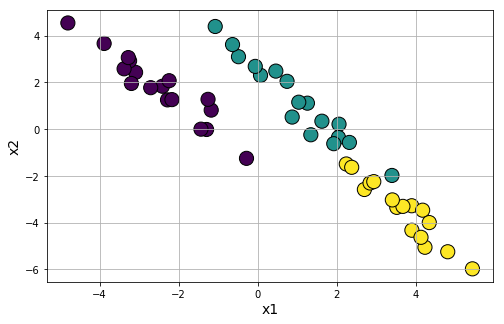

In [29]:
plt.figure(figsize=(8,5))
plt.scatter(df5['x1'],df5['x2'],c=df5['y'],s=200,edgecolors='k')
plt.xlabel('x1',fontsize=14)
plt.ylabel('x2',fontsize=14)
plt.grid(True)
plt.show()

### Making concentric circle clusters

In [30]:
from sklearn.datasets import make_circles

In [31]:
data6 = make_circles(n_samples=50, shuffle=True, noise=None, random_state=None, factor=0.6)
df6 = pd.DataFrame(data6[0],columns=['x'+str(i) for i in range(1,3)])
df6['y'] = data6[1]

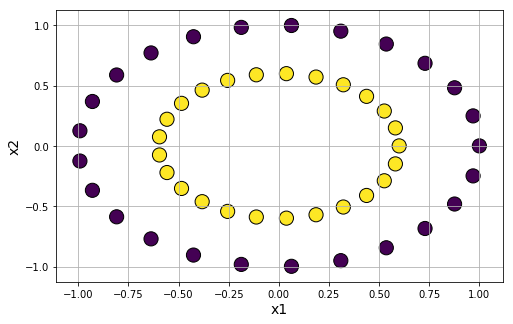

In [32]:
plt.figure(figsize=(8,5))
plt.scatter(df6['x1'],df6['x2'],c=df6['y'],s=200,edgecolors='k')
plt.xlabel('x1',fontsize=14)
plt.ylabel('x2',fontsize=14)
plt.grid(True)
plt.show()

### Introdue noise in the circle clusters

In [33]:
data6 = make_circles(n_samples=50, shuffle=True, noise=0.15, random_state=None, factor=0.6)
df6 = pd.DataFrame(data6[0],columns=['x'+str(i) for i in range(1,3)])
df6['y'] = data6[1]

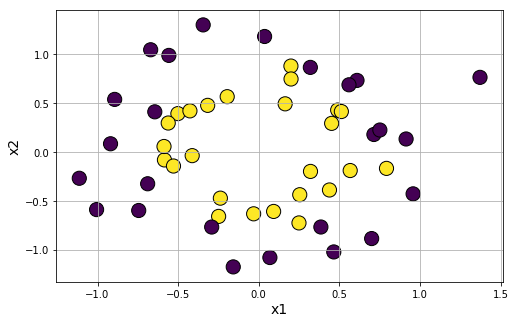

In [34]:
plt.figure(figsize=(8,5))
plt.scatter(df6['x1'],df6['x2'],c=df6['y'],s=200,edgecolors='k')
plt.xlabel('x1',fontsize=14)
plt.ylabel('x2',fontsize=14)
plt.grid(True)
plt.show()

### Make moon shape clusters

In [35]:
from sklearn.datasets import make_moons

In [36]:
data7 = make_moons(n_samples=50, shuffle=True, noise=None, random_state=None)
df7 = pd.DataFrame(data7[0],columns=['x'+str(i) for i in range(1,3)])
df7['y'] = data7[1]

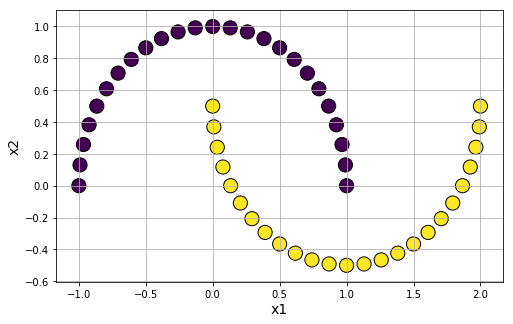

In [37]:
plt.figure(figsize=(8,5))
plt.scatter(df7['x1'],df7['x2'],c=df7['y'],s=200,edgecolors='k')
plt.xlabel('x1',fontsize=14)
plt.ylabel('x2',fontsize=14)
plt.grid(True)
plt.show()

### Introduce noise in the moon-shaped clusters

In [38]:
data7 = make_moons(n_samples=50, shuffle=True, noise=0.1, random_state=None)
df7 = pd.DataFrame(data7[0],columns=['x'+str(i) for i in range(1,3)])
df7['y'] = data7[1]

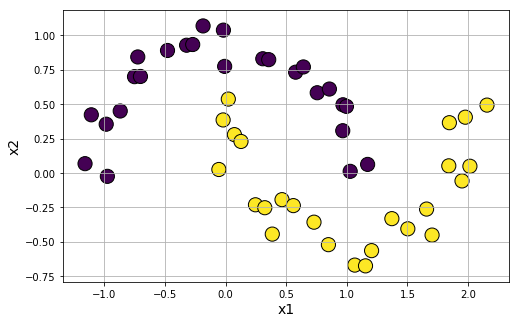

In [39]:
plt.figure(figsize=(8,5))
plt.scatter(df7['x1'],df7['x2'],c=df7['y'],s=200,edgecolors='k')
plt.xlabel('x1',fontsize=14)
plt.ylabel('x2',fontsize=14)
plt.grid(True)
plt.show()

## Random regression/classification problem generation using symbolic function

In [2]:
from csmt.datasets.data_generator.Symbolic_regression_classification_generator import gen_regression_symbolic, gen_classification_symbolic

### Generate regression data with a symbolic expression of:
$$\frac{x_1^2}{2}-3x_2+20.\text{sin}(x_3)$$

In [4]:
import pandas as pd
data8 = gen_regression_symbolic(m='((x1^2)/2-3*x2)+20*sin(x3)',n_samples=50,noise=0.01)
df8=pd.DataFrame(data8, columns=['x'+str(i) for i in range(1,4)]+['y'])

In [5]:
df8.head()

,x1,x2,x3,y
0,-0.545086,-7.74143,0.903773,39.0879623901725
1,0.0540713,4.04447,-10.221,2.16750489043808
2,6.27188,-5.25932,-1.54595,15.4533601663206
3,7.26716,6.96101,-0.361013,-1.53907124857051
4,-4.49484,2.99641,-2.81035,-5.40199358684643


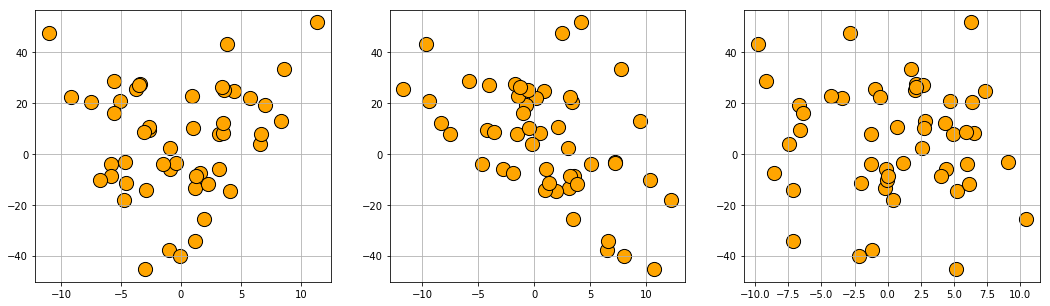

In [57]:
plt.figure(figsize=(18,5))
for i in range(1,4):
    plt.subplot(1,3,i)
    plt.scatter(df8[df8.columns[i-1]],df8['y'],s=200,c='orange',edgecolor='k')
    plt.grid(True)

### Generate regression data with a symbolic expression of:
$$x_1^2*sin(x_1)$$

In [67]:
data8 = 0.1*gen_regression_symbolic(m='x1^2*sin(x1)',n_samples=200,noise=0.05)
df8=pd.DataFrame(data8, columns=['x'+str(i) for i in range(1,2)]+['y'])

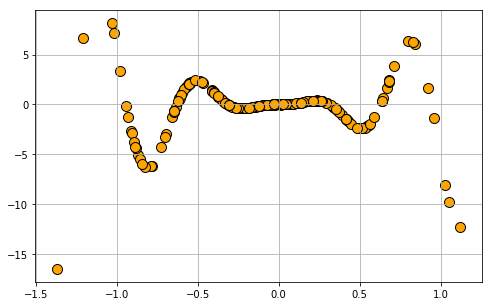

In [68]:
plt.figure(figsize=(8,5))
plt.scatter(df8['x1'],df8['y'],s=100,c='orange',edgecolor='k')
plt.grid(True)

### Generate classification data with a symbolic expression of:
$$\frac{x_1^2}{3}-\frac{x_2^2}{15}$$

In [6]:
data9 = gen_classification_symbolic(m='((x1^2)/3-(x2^2)/15)',n_samples=500,flip_y=0.01)
df9=pd.DataFrame(data9, columns=['x'+str(i) for i in range(1,3)]+['y'])

In [8]:
data9

array([[-4.94863821, -2.66997686,  1.        ],
       [ 5.31221383, -5.71982198,  1.        ],
       [ 9.72902425, -6.77023994,  1.        ],
       ...,
       [-1.78453898, -3.1064902 ,  1.        ],
       [-4.93861994,  8.12371381,  1.        ],
       [ 5.50032824,  2.95264519,  1.        ]])

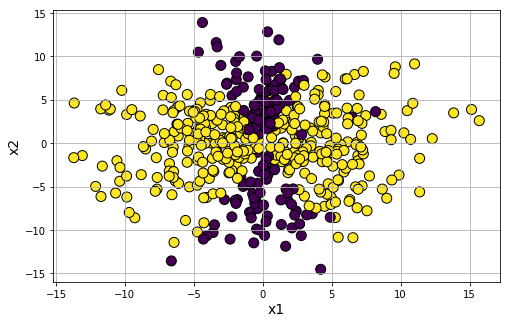

In [314]:
plt.figure(figsize=(8,5))
plt.scatter(df9['x1'],df9['x2'],c=df9['y'],s=100,edgecolors='k')
plt.xlabel('x1',fontsize=14)
plt.ylabel('x2',fontsize=14)
plt.grid(True)
plt.show()

### Generate classification data with a symbolic expression of:
$$x_1-3.\text{sin}\frac{x_2}{2}$$

In [317]:
data9 = gen_classification_symbolic(m='x1-3*sin(x2/2)',n_samples=500,flip_y=0.01)
df9=pd.DataFrame(data9, columns=['x'+str(i) for i in range(1,3)]+['y'])

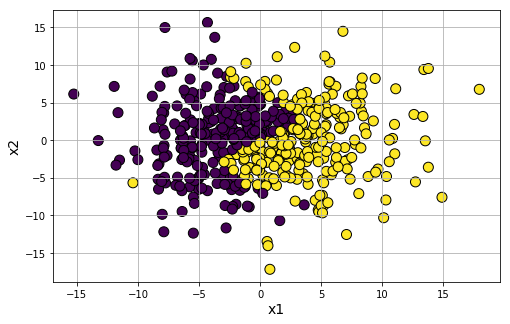

In [318]:
plt.figure(figsize=(8,5))
plt.scatter(df9['x1'],df9['x2'],c=df9['y'],s=100,edgecolors='k')
plt.xlabel('x1',fontsize=14)
plt.ylabel('x2',fontsize=14)
plt.grid(True)
plt.show()

## Generate name, address, phone number, email etc. using `pydbgen` package

This is a package you need to install first with **`pip install pydbgen`**.

Full documentation about this package is available here: **[pydbgen documentation](https://pydbgen.readthedocs.io/en/latest/)**

In [320]:
from pydbgen import pydbgen

In [321]:
generator = pydbgen.pydb()

### Generate a license-plate (US style)

In [322]:
generator.license_plate()

'OKY-2318'

### Generate few random names

In [323]:
generator.gen_data_series(num=10,data_type='name')

0        Pamela Cook
1     Lindsey Wright
2      Rachel Steele
3    Latasha Jenkins
4    Reginald Harris
5     Timothy Conner
6       Tina Johnson
7      Michael Smith
8       Lucas Hansen
9     Elizabeth Cruz
dtype: object

### Generate random phone numbers

In [327]:
generator.simple_ph_num()

'389-066-8154'

In [328]:
generator.gen_data_series(num=10,data_type='phone_number_full')

0            754-279-1802
1          1-761-599-9477
2        460-649-0208x548
3    1-522-294-6949x75198
4        +18(8)9084634782
5           (278)795-4557
6        +32(7)5595839493
7      645-121-0018x53889
8            230-079-7069
9       (753)057-2266x606
dtype: object

### Generate a full data frame with random name, street address, SSN, email, date

In [337]:
df10 = generator.gen_dataframe(fields=['name','street_address','ssn','email','date'])

In [338]:
df10

,name,street_address,ssn,email,date
0,Tiffany Brown,88274 Susan Gateway Suite 656,342-54-8064,TiffanyBrown43@yandex.com,1972-12-25
1,Troy Fowler,0185 Marcus Rapids,257-09-0833,Troy_Fowler12@hotmail.com,1993-11-22
2,Linda Smith,7566 Roberts Road Suite 027,389-50-9696,LindaSmith@aol.com,2012-04-18
3,Brian Fisher MD,87648 Jose Parkway,399-60-2669,BMD@yandex.com,2003-07-17
4,Erica Harris,42393 Mills Branch Apt. 716,561-05-8951,EHarris88@outlook.com,1983-11-20
5,John Gonzalez,939 Ferguson Heights,386-99-3545,John_G@att.com,1990-05-15
6,Christopher Levy,5955 Graves Camp,363-53-9313,Christopher.Levy66@hotmail.com,1979-05-30
7,Emma Morton,328 Zimmerman Harbor Apt. 885,458-07-2763,Emma_M@yandex.com,1990-03-02
8,Donna Cameron,766 Ingram Throughway Suite 540,238-99-3537,DonnaCameron@verizon.com,1976-02-21
9,Diane Taylor MD,90039 Donald Road Apt. 532,290-73-1196,DianeMD@outlook.com,1985-04-16
